1. Import and Install Dependencies

In [9]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 648.1 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 1.6 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.8 MB 2.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.8 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [10]:
%pip install --upgrade mediapipe

   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   - -------------------------------------- 1.3/50.8 MB 9.5 MB/s eta 0:00:06
   ------ --------------------------------- 8.1/50.8 MB 24.0 MB/s eta 0:00:02
   ------------ --------------------------- 15.7/50.8 MB 33.0 MB/s eta 0:00:02
   -------------------- ------------------- 26.0/50.8 MB 35.0 MB/s eta 0:00:01
   ------------------------ --------------- 31.5/50.8 MB 33.3 MB/s eta 0:00:01
   ----------------------------- ---------- 38.0/50.8 MB 32.7 MB/s eta 0:00:01
   ---------------------------------- ----- 44.3/50.8 MB 32.4 MB/s eta 0:00:01
   ----------------------------------- ---- 45.6/50.8 MB 32.3 MB/s eta 0:00:01
   ---------------------------------------  50.6/50.8 MB 28.5 MB/s eta 0:00:01
   ---------------------------------------- 50.8/50.8 MB 27.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 16.9 MB/s eta 0:00:

In [11]:
%pip install --upgrade protobuf==4.25.3

  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install tensorflow opencv-python scikit-learn matplotlib

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.8 MB 11.3 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/38.8 MB 20.2 MB/s eta 0:00:02
   ----------- ---------------------------- 11.3/38.8 MB 21.4 MB/s eta 0:00:02
   -------------- ------------------------- 14.2/38.8 MB 18.9 MB/s eta 0:00:02
   ----------------- ---------------------- 17.0/38.8 MB 18.2 MB/s eta 0:00:02
   --------------------- ------------------ 20.4/38.8 MB 17.9 MB/s eta 0:00:02
   ------------------------ --------------- 23.6/38.8 MB 17.2 MB/s eta 0:00:01
   --------------------------- ------------ 26.7/38.8 MB 17.0 MB/s eta 0:00:01
   ------------------------------ --------- 29.9/38.8 MB 16.8 MB/s eta 0:00:01
   ---------------------------------- ----- 33.3/38.8 MB 16.5 MB/s eta 0:00:01
   ------------------------------------- -- 36.4/38.8 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 16.1 M

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="google.protobuf.symbol_database")

2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic #to detect
mp_drawing = mp.solutions.drawing_utils # to draw
mp_face_mesh = mp.solutions.face_mesh  # for face mesh connections

In [5]:
def mediapipe_detection(image, model):  # pass image and model
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # bgr 2 rgb
    image.flags.writeable = False 
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [6]:
def draw_landmarks(image, results):  # draw landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)  # face landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # pose landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # left hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # right hand landmarks


In [7]:
def draw_styled_landmarks(image, results):  # draw styled landmarks
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [8]:
# def draw_landmarks(image, results): #draw landmarks
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) #face landmarks
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #pose landmarks
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #left hand landmarks
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #right hand landmarks

In [9]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_styled_landmarks(image, results)

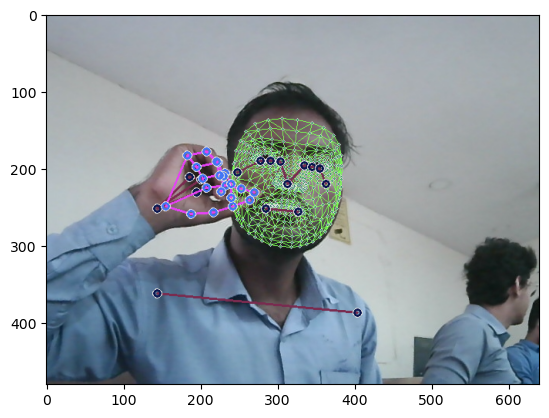

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values

In [13]:
results.pose_landmarks.landmark[0].visibility

0.9995939135551453

In [14]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [15]:
print(len(results.pose_landmarks.landmark))
# print(len(results.left_hand_landmarks.landmark))
# print(len(results.right_hand_landmarks.landmark))
print(len(results.face_landmarks.landmark))

33
468


In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [17]:
pose.shape

(132,)

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test=extract_keypoints(results)

In [20]:
result_test

array([ 0.49042147,  0.45914787, -1.09055507, ...,  0.35189593,
        0.43712106, -0.03793541])

In [33]:
np.save('0', result_test)

In [34]:
np.load('0.npy')

array([ 0.45327577,  0.35068378, -0.74088871, ...,  0.        ,
        0.        ,  0.        ])

In [35]:
extract_keypoints(results).shape
#468*3+33*4+21*3+21*3 

(1662,)

4. Setup Folders for Collection

In [23]:
#export numpy array data
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(['Hello','Bharati Bharat', 'Sign', 'Bhasha', 'Bye Bye', 'Phir Se', 'Main', 'Tu Tum Aap' , 'Aadmi Mard', 'Aurat Nari' , 
                    'Badhir (Deaf)', 'Hearing' , 'Shikshak' ,'Dhanyawad', 'Welcome' ,'Maafi Kshama' , 'Namaste'])

#Thirty videos worth of data
no_sequences = 40

#Videos are going to be of 30 frames in length
sequence_length = 30

In [24]:
#hello
#thanks
#i love you

In [25]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Collect Keypoint Values for Training and Testing

In [39]:
cap.release()
cv2.destroyAllWindows()

In [34]:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # while cap.isOpened():
    #Loop through actions   
    #NEW
    for action in actions:
        #Loop through sequences aka 
        for sequence in range(no_sequences):
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
            
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                draw_styled_landmarks(image, results)
                # Wait until atleast 2 seconds pass
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2500)
                else:
                    cv2.putText(image, 'Collecting frames for {action} Video Number {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path,keypoints)
               
                
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data\\Aap Kaise Hain \\0\\0.npy'

6. Preprocess Data and Create Labels and Features

In [40]:
from sklearn.model_selection  import train_test_split
from tensorflow.keras.utils import to_categorical

In [41]:
label_map={label:num for num, label in enumerate(actions)}

In [42]:
label_map

{'Hello': 0,
 'Bharati Bharat': 1,
 'Sign': 2,
 'Bhasha': 3,
 'Bye Bye': 4,
 'Phir Se': 5,
 'Main': 6,
 'Tu Tum Aap': 7,
 'Aadmi Mard': 8,
 'Aurat Nari': 9,
 'Badhir (Deaf)': 10,
 'Hearing': 11,
 'Shikshak': 12,
 'Dhanyawad': 13,
 'Welcome': 14,
 'Maafi Kshama': 15,
 'Namaste': 16}

In [43]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        

In [44]:
np.array(sequences).shape

(680, 30, 1662)

In [45]:
np.array(labels).shape

(680,)

In [46]:
X = np.array(sequences)

In [47]:
X.shape

(680, 30, 1662)

In [48]:
y = to_categorical(labels).astype(int)

In [49]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [51]:
X_train.shape

(646, 30, 1662)

In [52]:
X_test.shape

(34, 30, 1662)

In [53]:
y_train.shape

(646, 17)

In [54]:
y_test.shape

(34, 17)

7. Build and Traom LSTM Neural Network

In [55]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [57]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [58]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\se\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
actions.shape[0]

17

In [21]:
res = [.7, .2, .1]

In [61]:
actions[np.argmax(res)]

'Hello'

1) Less Data reproduce a hyper accurate model
2)  Much Denser Neural Network
3) Faster to train
4) NN is lot simpler and meant that it was going to be a whole heap faster when it comes to detecting in real time

In [75]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=50, callbacks=[tb_callback])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - categorical_accuracy: 0.2837 - loss: 8.0878
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.4931 - loss: 13.6578
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3288 - loss: 15.4829
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3091 - loss: 9.1079
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3523 - loss: 4.3824
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.5010 - loss: 3.1705
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.1761 - loss: 4.5108
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3288 - loss: 8.5006
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - categorical_accuracy: 0.3328 - loss: 18.2391
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.3954 - loss: 16.1409
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/

In [60]:
model.summary()

NameError: name 'model' is not defined

8. Make Predictions

In [59]:
res = model.predict(X_test)

NameError: name 'model' is not defined

In [53]:
actions[np.argmax(res[4])]

'hello'

In [54]:
actions[np.argmax(y_test[4])]

'hello'

9.  Save Weights

In [58]:
model.save('action.h5')

NameError: name 'model' is not defined

In [56]:
del model

In [26]:
from tensorflow.keras.models import load_model
model = load_model('my_model.keras')

In [27]:
model.load_weights('action.h5')

ValueError: The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(128, 512), Received: value.shape=(128, 256). Target variable: <KerasVariable shape=(128, 512), dtype=float32, path=lstm_29/lstm_cell/kernel>

10. Evaluating using Confusion Matrix and Accuracy

In [6]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [79]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


In [80]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [81]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 1],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [82]:
accuracy_score(ytrue, yhat)

0.8

11. Test in Real Time

In [28]:
# colors = ['red', 'blue', 'green']
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

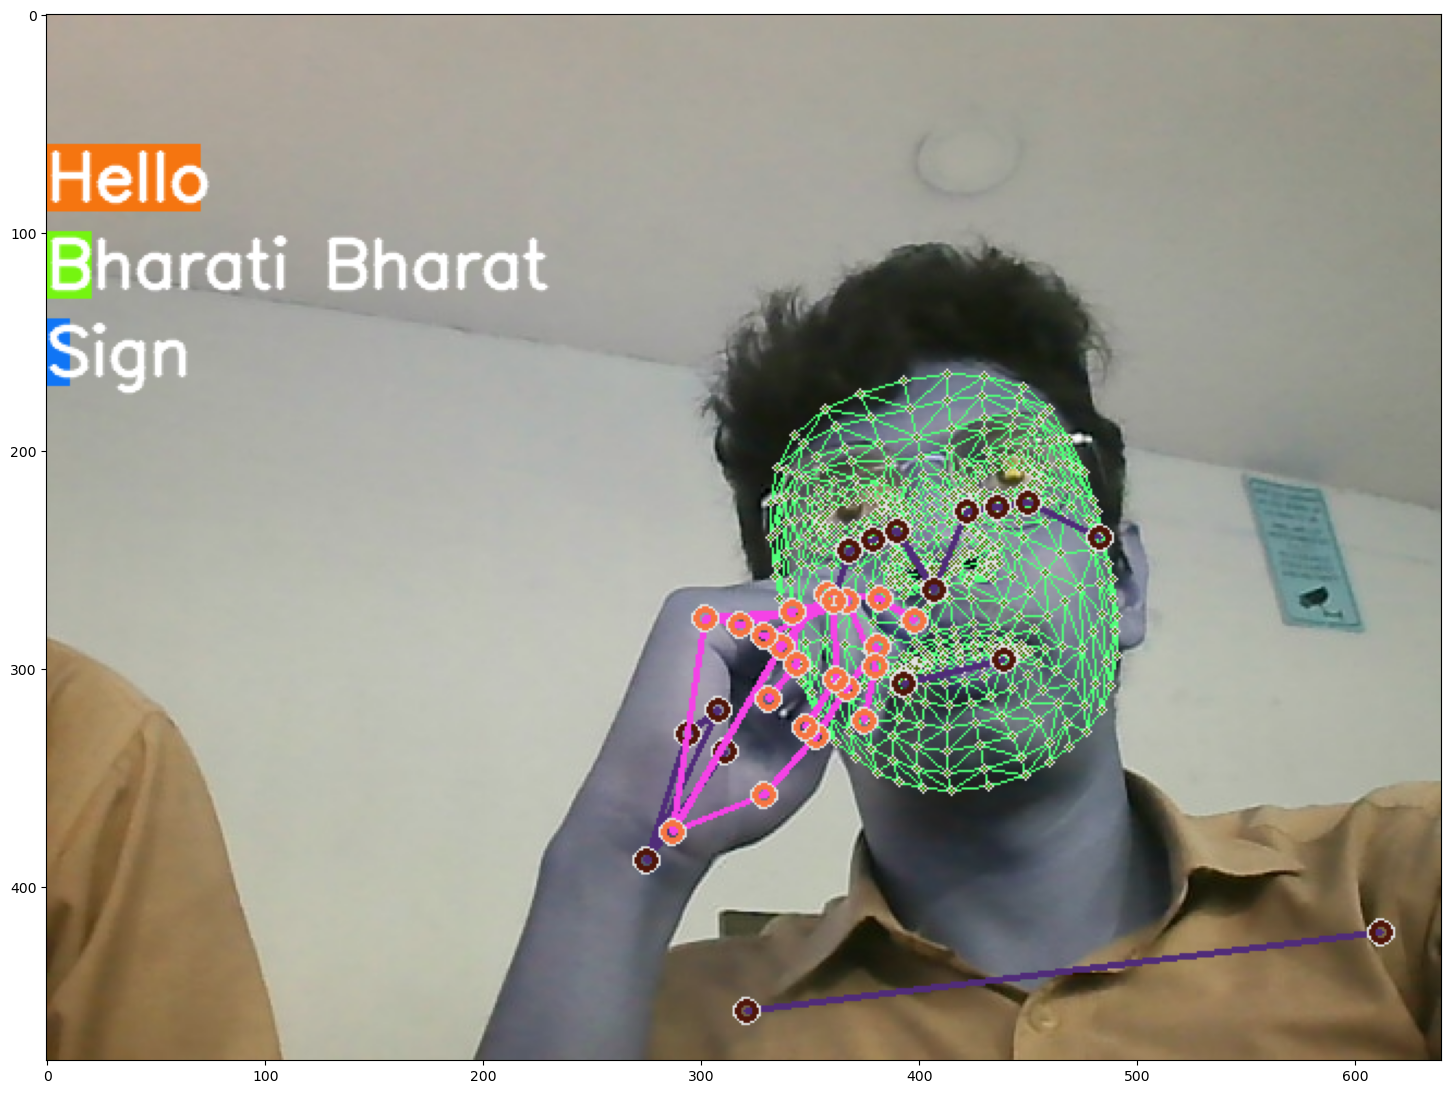

In [29]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [64]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [65]:
len(sequence)

TypeError: object of type 'int' has no len()

In [66]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [32]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range

: 

In [21]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Load the trained model
model = load_model('my_model.keras')

# Example actions for the prediction
actions = ['action1', 'action2', 'action3', 'action4']  # Modify this list based on your model's output classes

# Define colors for visualizing the actions
colors = [(245,117,16), (117,245,16), (16,117,245)]  # Initial colors

# Extend the colors list if the number of actions is greater than colors
if len(actions) > len(colors):
    import random
    for _ in range(len(actions) - len(colors)):
        colors.append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

# Define a function to visualize probabilities
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    num_colors = len(colors)
    for num, prob in enumerate(res[:num_colors]):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Visualization setup
plt.figure(figsize=(18,18))

# Real-time detection variables
sequence = []
sentence = []
threshold = 0.8

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

# Set up the MediaPipe holistic model
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the webcam

        if not ret:
            break  # Break if the webcam feed is not available

        # Make detections using MediaPipe
        image, results = frame, holistic.process(frame)
        # You can define functions `mediapipe_detection()` and `draw_styled_landmarks()` based on your earlier implementations

        # Extract keypoints (you'll need a function `extract_keypoints()` that extracts relevant keypoints)
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames for prediction

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

            # Prediction logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            image = prob_viz(res, actions, image, colors)

        # Display the prediction on the video frame
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the processed frame
        cv2.imshow('OpenCV Feed', image)

        # Exit if the user presses 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Example: Access prediction results from a test set (this part depends on your model setup)
# y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
action2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
action2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
action2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
action2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

: 

In [2]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import random

# Load the trained model
model = load_model('my_model.keras')

# Example actions for the prediction (Modify this list based on your model's output classes)
actions = ['action1', 'action2', 'action3', 'action4']  # Ensure this matches the model's output

# Define colors for visualizing the actions
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Initial colors

# Extend the colors list if the number of actions is greater than colors
if len(actions) > len(colors):
    for _ in range(len(actions) - len(colors)):
        colors.append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

# Define a function to visualize probabilities
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    num_colors = len(colors)
    for num, prob in enumerate(res[:num_colors]):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Real-time detection variables
sequence = []
sentence = []
threshold = 0.8

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

# Set up the MediaPipe holistic model
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the webcam

        if not ret:
            break  # Break if the webcam feed is not available

        # Make detections using MediaPipe
        image, results = frame, holistic.process(frame)

        # You can define functions `mediapipe_detection()` and `draw_styled_landmarks()` based on your earlier implementations
        # Draw landmarks and visualize (You need to implement these if not done)
        # draw_styled_landmarks(image, results)

        # Extract keypoints (you need a function `extract_keypoints()` that extracts relevant keypoints)
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only the last 30 frames for prediction

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(f"Predictions: {res}")  # Print the predictions for debugging

            predicted_index = np.argmax(res)

            # Check if the predicted index is within the bounds of the actions list
            if predicted_index < len(actions):
                print(actions[predicted_index])  # Safely access actions

                # Prediction logic
                if res[predicted_index] > threshold:
                    if len(sentence) > 0:
                        if actions[predicted_index] != sentence[-1]:
                            sentence.append(actions[predicted_index])
                    else:
                        sentence.append(actions[predicted_index])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Visualize probabilities
                image = prob_viz(res, actions, image, colors)

        # Display the prediction on the video frame
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the processed frame
        cv2.imshow('OpenCV Feed', image)

        # Exit if the user presses 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Predictions: [2.9797028e-03 9.3206215e-01 5.6778583e-05 1.9240022e-05 2.2473217e-03
 2.6969181e-04 6.0502373e-02 5.9507474e-05 4.1910404e-04 9.9835233e-08
 7.9341704e-04 1.2382431e-05 9.7530574e-06 3.7825004e-05 4.5744628e-06
 5.1395776e-04 1.2032750e-05]
action2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions: [2.2411812e-03 9.4276392e-01 8.1803744e-05 1.8941138e-05 5.6735934e-03
 3.8947130e-04 4.6344381e-02 1.1972240e-04 6.0428760e-04 1.1436062e-07
 6.5154256e-04 1.6465950e-05 9.8535029e-06 4.4912947e-05 6.4273704e-06
 1.0153651e-03 1.7965682e-05]
action2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions: [1.7116386e-03 9.4547361e-01 1.1168804e-04 1.8466872e-05 1.4158347e-02
 5.1047170e-04 3.4621023e-02 2.4004451e-04 8.8603410e-04 1.3252514e-07
 5.5292167e-04 1.8702631e-05 1.0101837e-05 5.4586431e-05 9.4394327e-06
 1.6000707e-03 2.2786431e-05]
action2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions: [1.6537041e-03 9.3501639e-01 1.3997691e-04

In [94]:
cap.release()
cv2.destroyAllWindows()

In [95]:
res[np.argmax(res)] > threshold

False

In [96]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [97]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[5.5791175e-01, 4.6952028e-04, 4.4161868e-01]], dtype=float32)